<a href="https://colab.research.google.com/github/dtabuena/Images/blob/main/DFOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

def get_drobox_file(new_filename, link):
    !wget -O $new_filename $link
    return new_filename

new_filename = 'my_tiff.tiff'
link = 'https://www.dropbox.com/s/i9k6trbhpry0jt9/230515_001%5B1-3000_EX0%5D.TIF?dl=0'
# !wget -O $new_filename $link
get_drobox_file('my_tiff.tiff','https://www.dropbox.com/s/i9k6trbhpry0jt9/230515_001%5B1-3000_EX0%5D.TIF?dl=0')

--2023-05-16 05:26:25--  https://www.dropbox.com/s/i9k6trbhpry0jt9/230515_001%5B1-3000_EX0%5D.TIF?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/i9k6trbhpry0jt9/230515_001%5B1-3000_EX0%5D.TIF [following]
--2023-05-16 05:26:25--  https://www.dropbox.com/s/raw/i9k6trbhpry0jt9/230515_001%5B1-3000_EX0%5D.TIF
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb79c42a430046551aa57e78768.dl.dropboxusercontent.com/cd/0/inline/B8J6OJ2P2ed1BDDzml8hkSgPW2GlfTtc_csVepDB8ePSZuokQTX9UithN1E7wjOAYDOXenYL7FGHhd3nHpAVV-tD4eCceFsye_FVzcgxx4y2w43FmmbLSoebMuNc3AyPY1dwUMKODGJIL6PgJK38OR0di0FzOckCZvh8pbcyROss6w/file# [following]
--2023-05-16 05:26:26--  https://ucb79c42a430046551aa57e78768.dl.dropboxusercontent.com/cd/0/inline/B8J6OJ2P2ed1BDDzml8hk

'my_tiff.tiff'

In [2]:
# import numpy as np
# from skimage import io
# im = io.imread('/content/my_tiff.tiff')
# print(im.shape)

In [10]:
import tifffile
im = tifffile.imread('/content/my_tiff.tiff', maxworkers=6)
binsize = 4
height = im.shape[1] // binsize
width = im.shape[2] // binsize
im = im[:, :height * binsize, : width * binsize]
im = im.reshape(im.shape[0], height, binsize, width, binsize)
ims = im.sum((2, 4), dtype='uint32')


In [16]:
tifffile.imwrite('temp_imgJ.tif', ims)

ExecutableNotFoundError: ignored

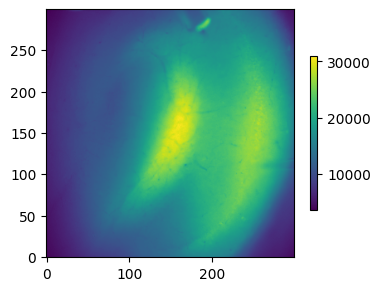

In [30]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(4, 4))

frame = 0
im = plt.imshow(ims[frame], origin='lower')
plt.colorbar(shrink=0.5)

def update(*args):
    global frame

    im.set_array(ims[frame])

    frame += 1
    frame %= len(ims)

    return im,

# ani = animation.FuncAnimation(fig, update, interval=500)
ani = animation.FuncAnimation(fig, update, len(ims))
writer = animation.ImageMagickFileWriter(fps=50)
ani.save('movie.gif', writer=writer) 

In [19]:
im = '_'

In [14]:
ims.shape

(3000, 300, 300)

In [4]:
# import skimage
# image_ds = skimage.transform.downscale_local_mean(im, [1, 4 ,4])

In [5]:
# F0 = 1200
